In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:

from configuration import *
from figure_estimation import *
from spikeinterface.sortingcomponents.benchmark.benchmark_motion_estimation import plot_error_map_several_benchmarks

In [7]:
plt.rcParams.update({
    'font.size': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,

})

In [8]:
figure_folder = base_folder / 'figures' / 'estimation'
figure_folder.mkdir(exist_ok=True, parents=True)


extentions = ['png', 'pdf', 'tiff']

## load benchmark from disk

In [9]:
# this is quite long
all_benchmarks = {}
for drift_mode in drift_modes:
    for cells_position in cells_positions:
        for cells_rate in cells_rates:
            all_benchmarks[(drift_mode, cells_position, cells_rate)] = \
                load_benchmarks(drift_mode, cells_position, cells_rate)


## summary motion estimation errors

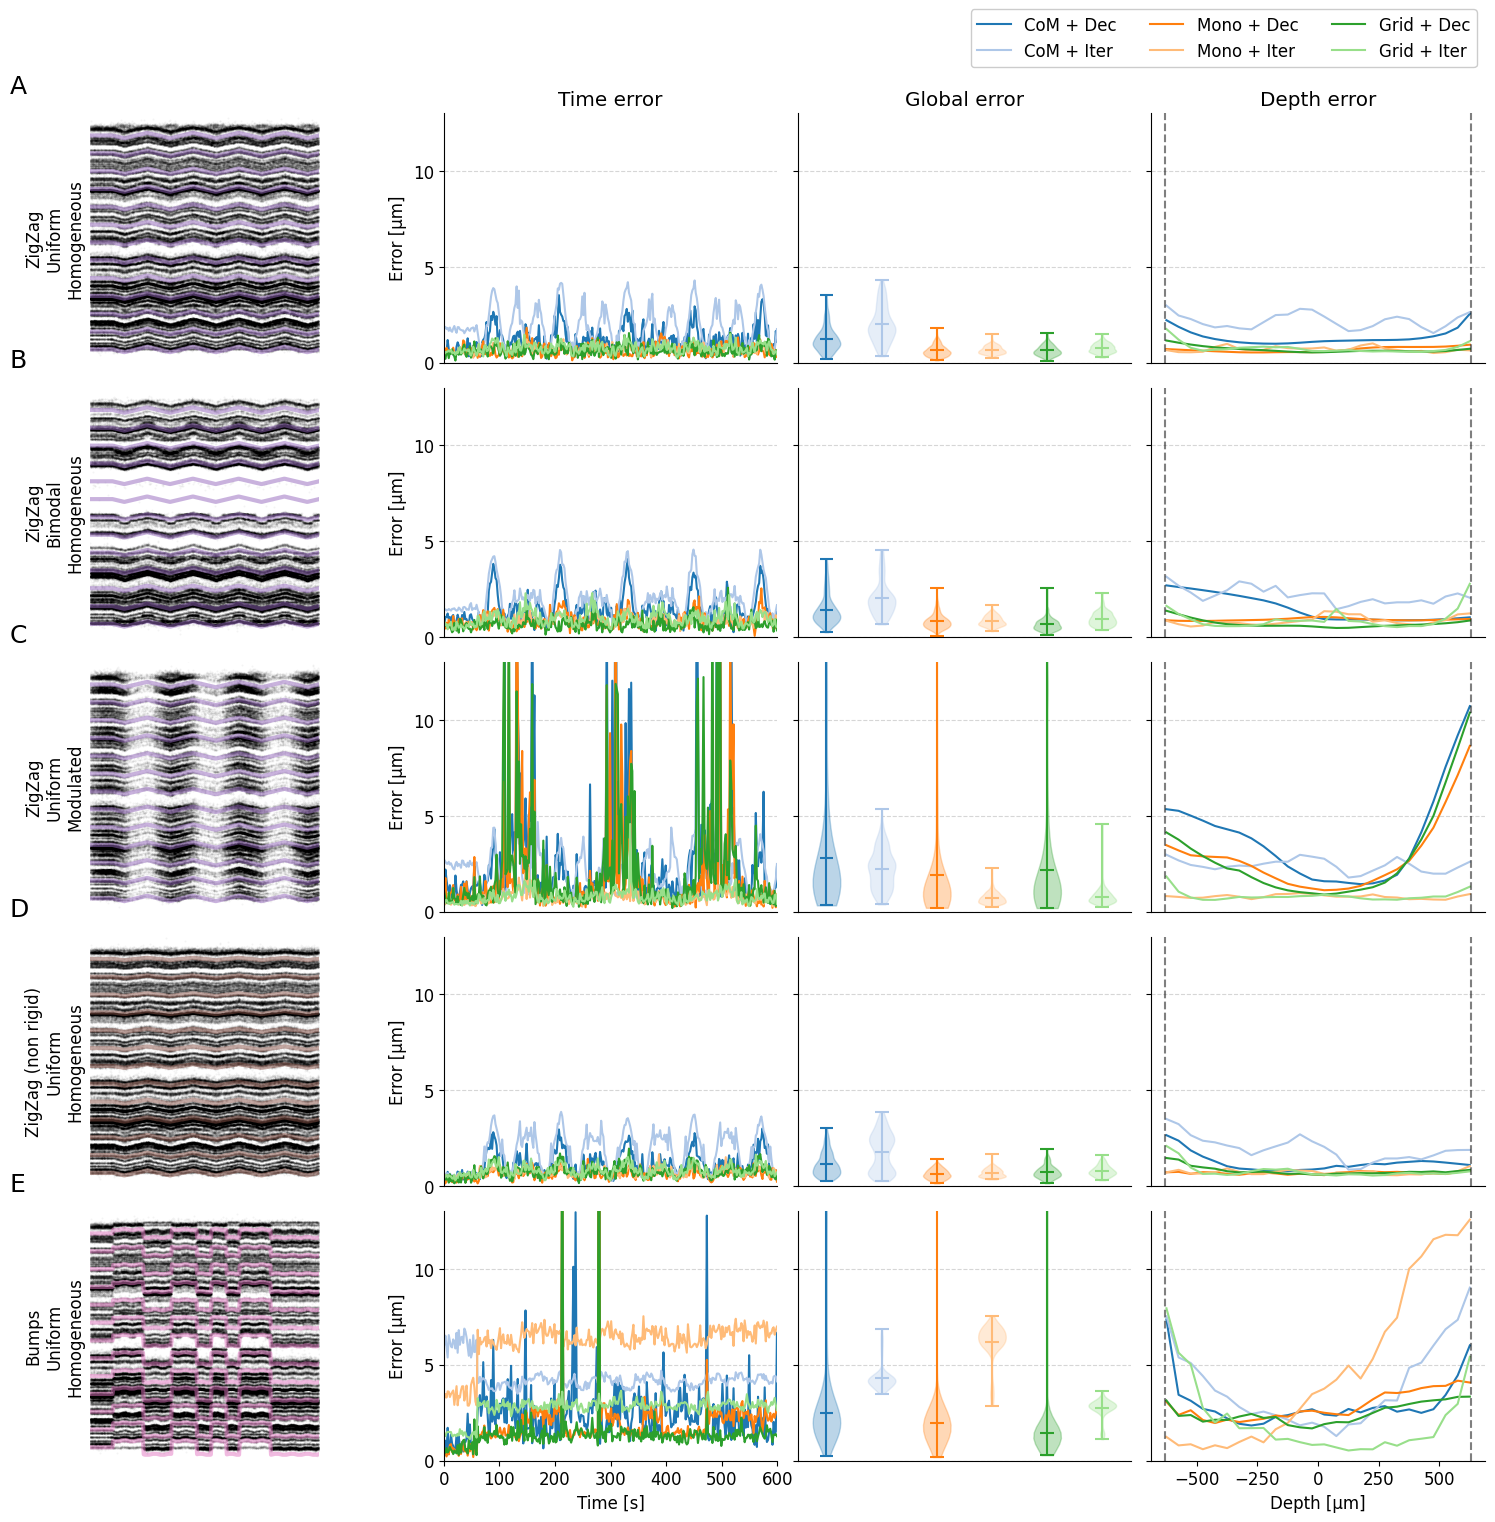

In [11]:
fig = plot_summary_errors_several_benchmarks(all_benchmarks, selected_keys, figsize=(18, 17.5))
for ext in extentions:
    fig.savefig(figure_folder / f'Figure4_summary_errors.{ext}')

## more drift results

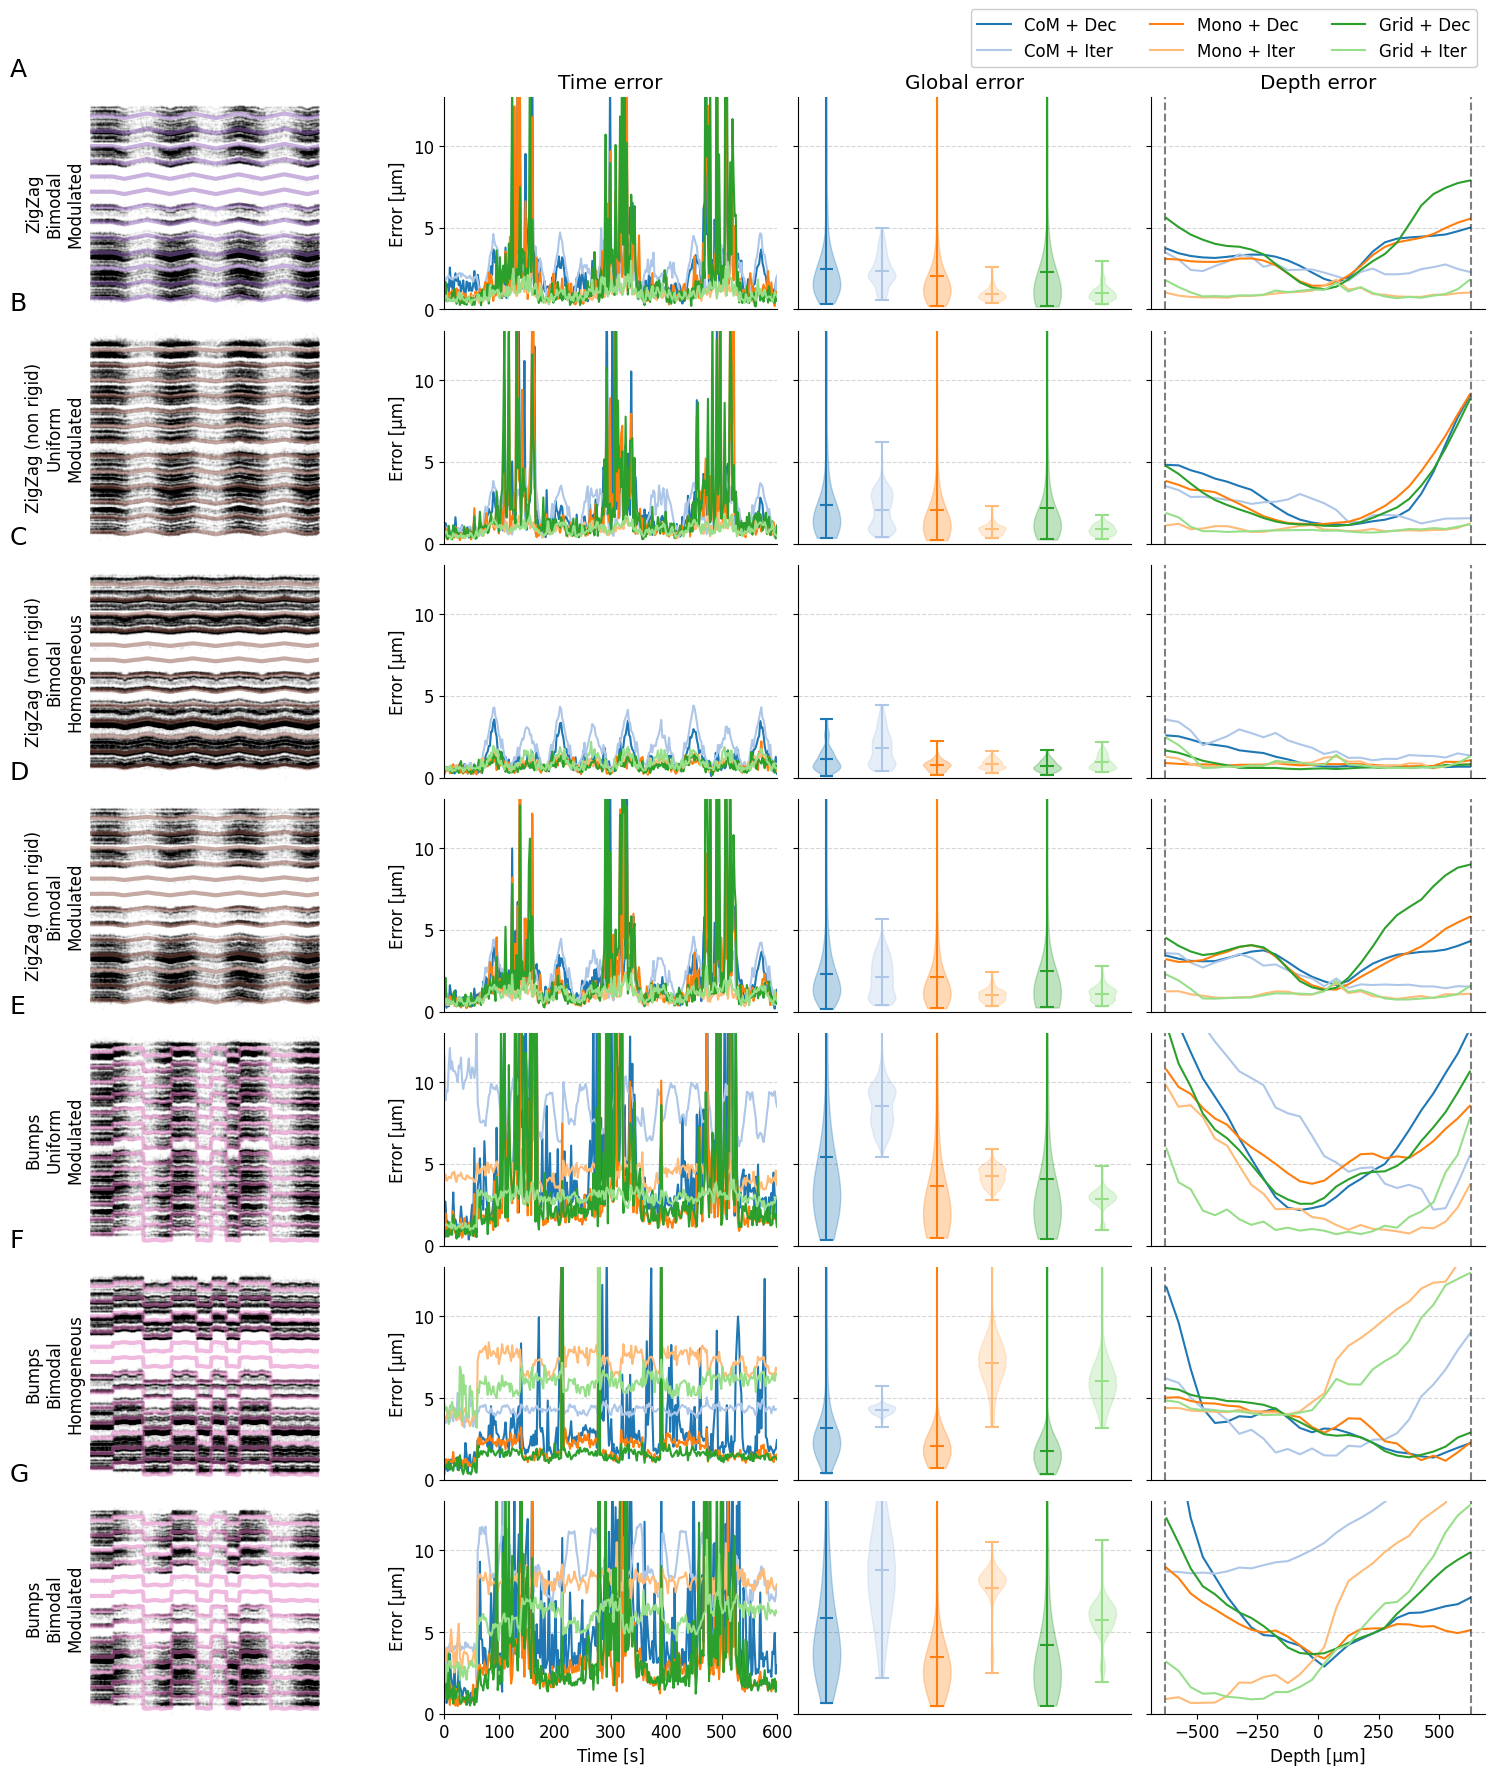

In [13]:
fig = plot_summary_errors_several_benchmarks(all_benchmarks, additional_keys, figsize=(18, 21))
for ext in extentions:
    fig.savefig(figure_folder / f'Figsupp2 more_summary_errors.{ext}')

## individual benchmark motion errors

In [8]:
all_benchmarks.keys()

dict_keys([('rigid', 'uniform', 'homogeneous'), ('rigid', 'uniform', 'modulated'), ('rigid', 'bimodal', 'homogeneous'), ('rigid', 'bimodal', 'modulated'), ('non-rigid', 'uniform', 'homogeneous'), ('non-rigid', 'uniform', 'modulated'), ('non-rigid', 'bimodal', 'homogeneous'), ('non-rigid', 'bimodal', 'modulated'), ('bumps', 'uniform', 'homogeneous'), ('bumps', 'uniform', 'modulated'), ('bumps', 'bimodal', 'homogeneous'), ('bumps', 'bimodal', 'modulated')])

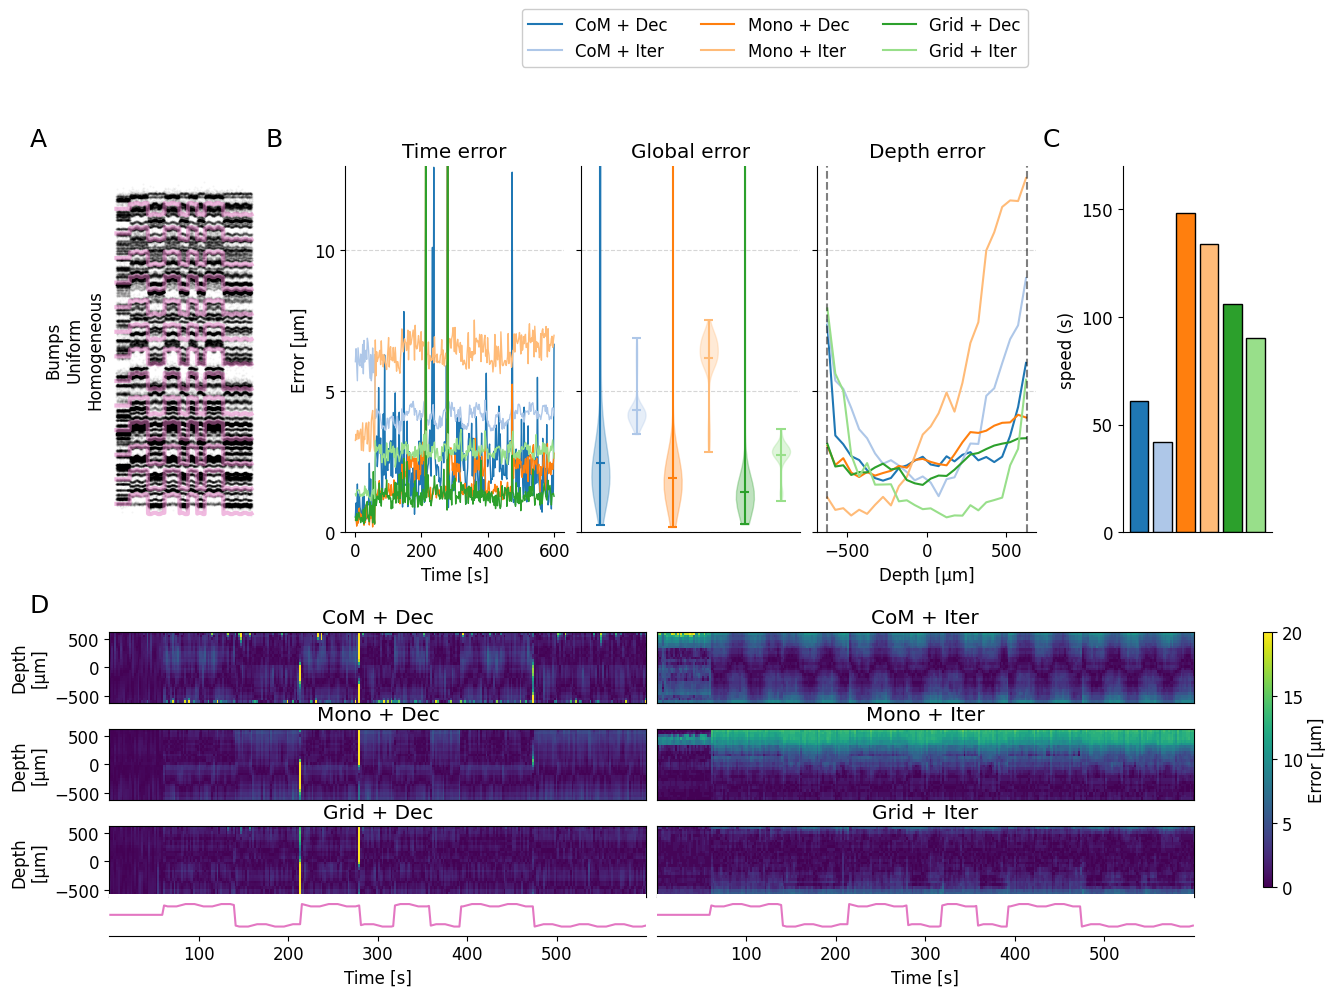

In [15]:
for key, benchmarks in all_benchmarks.items():
    if key != ('bumps', 'uniform', 'homogeneous'):
        continue
    label = drift_title(key)
    
    fig = plot_figure_individual_motion_benchmark(benchmarks, label=label, figsize=(15, 10))

    if key == ('bumps', 'uniform', 'homogeneous'):
        drift_mode, cells_position, cells_rate = key
        fig_name = f'Figure3 {probename}_{drift_mode}_{cells_position}_{cells_rate}'
        for ext in extentions:
            fig.savefig(figure_folder / f'{fig_name}.{ext}')


In [32]:
from figure_estimation import export_errors_to_xarray

In [67]:
all_errors = export_errors_to_xarray(all_benchmarks)
all_errors.to_netcdf(base_folder / "motion_errors.nc")